<a href="https://colab.research.google.com/github/lonewolf235/ML-Models/blob/main/Simple_Linear_Regression_Fuel(X).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Regression with CO2 emission just independent variable is Fuel Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving ML_Dataset_CO2Emission.csv to ML_Dataset_CO2Emission.csv


In [3]:
dataset=pd.read_csv('ML_Dataset_CO2Emission.csv')
print(dataset.shape)
dataset.head()

(1067, 4)


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [4]:
dataset.describe()

,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


In [5]:
X = dataset.Fuel_Consumption.values
Y = dataset.CO2_Emissions.values
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

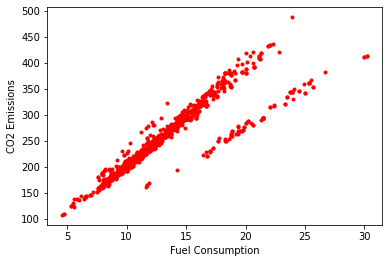

In [7]:
%matplotlib inline
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.scatter(X,Y,color='red',marker='.')

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [9]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(Xtrain,Ytrain)

LinearRegression()

In [10]:
predictions=reg.predict(Xtest)

In [11]:
coefficent=reg.coef_
coefficent

array([[14.02686012]])

In [12]:
intercept=reg.intercept_
intercept

array([70.85941528])

In [13]:
df = pd.DataFrame({'Actual': Ytest.tolist(), 'Predicted': predictions.tolist()})
df.shape

(321, 2)

In [14]:
df.head(10)

,Actual,Predicted
0,[356],[312.1214093586342]
1,[209],[218.14144654910817]
2,[230],[230.7656206578505]
3,[212],[220.94681857327313]
4,[168],[185.8796682712112]
5,[292],[281.26231709281967]
6,[212],[219.54413256119065]
7,[276],[261.624712923665]
8,[202],[213.93338851286074]
9,[334],[303.7052932861393]


In [15]:
df.tail(5)

,Actual,Predicted
316,[354],[334.5643855519538]
317,[258],[256.0139688753351]
318,[267],[258.81934089950005]
319,[297],[282.66500310490215]
320,[271],[250.40322482700518]


In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, predictions)))

Mean Absolute Error: 19.449369656766258
Mean Squared Error: 814.5702636720041
Root Mean Squared Error: 28.540677351317438


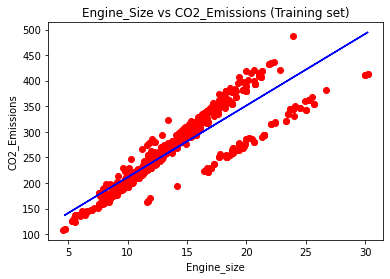

In [17]:
plt.scatter(X,Y,color='red')
plt.plot(Xtest,reg.predict(Xtest),color='blue')
plt.title('Engine_Size vs CO2_Emissions (Training set)')
plt.xlabel('Engine_size')
plt.ylabel('CO2_Emissions')
plt.show()

##Added R square accuracy

In [18]:
from sklearn.metrics import r2_score
r2=r2_score(Ytest,predictions)
print("Accuracy of model is ",round(r2*100,2),"%")

Accuracy of model is  79.46 %
